<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

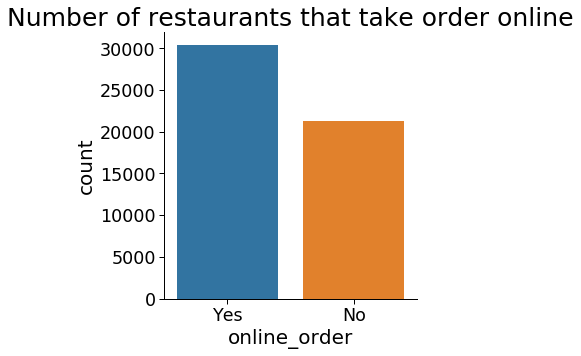

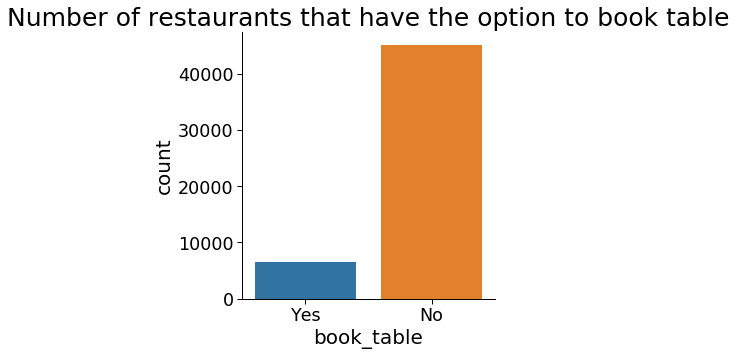

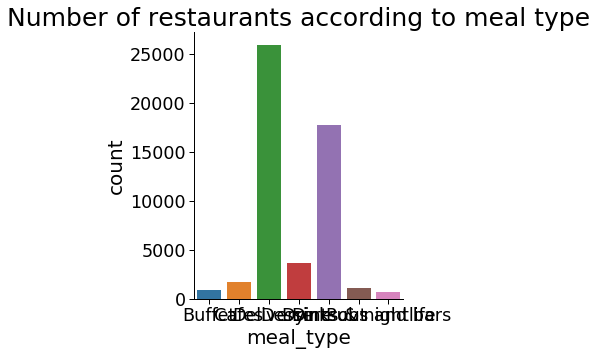

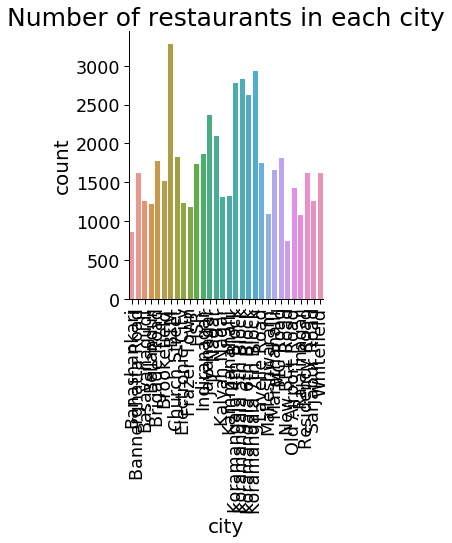

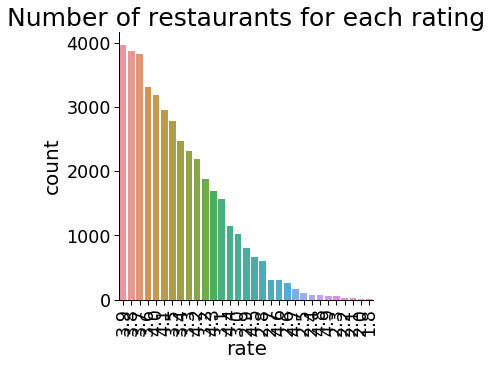

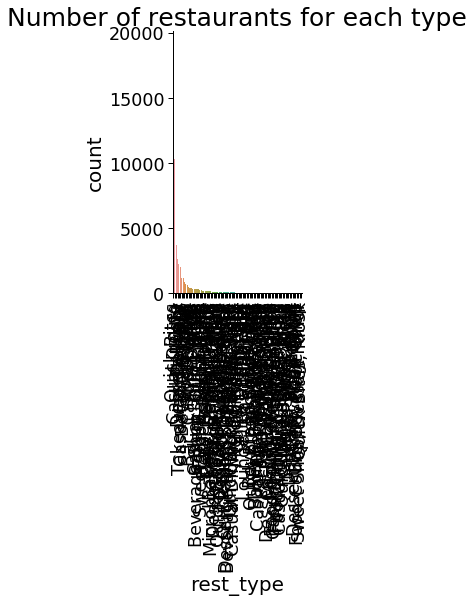

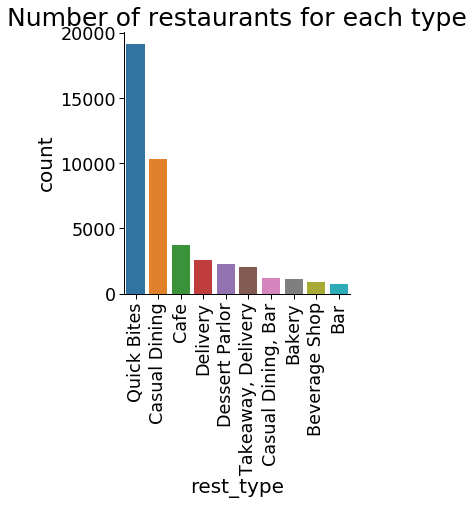

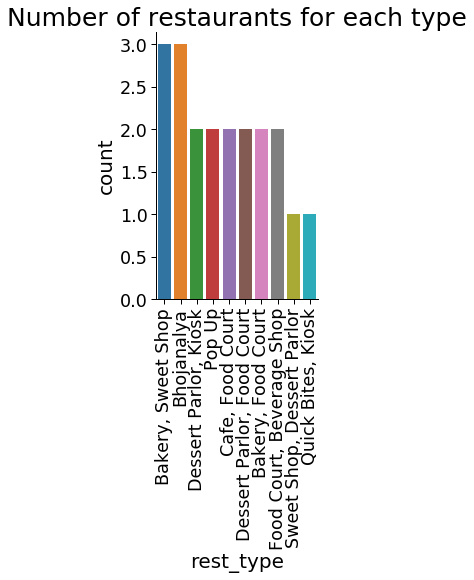

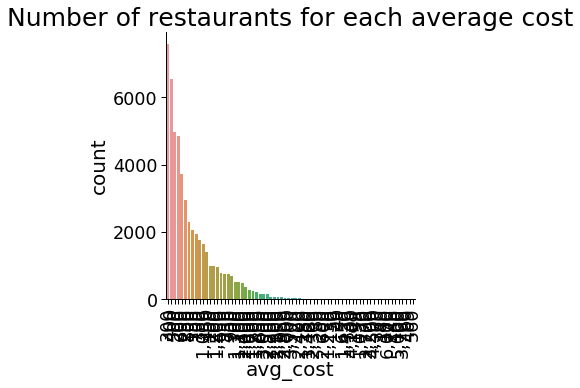

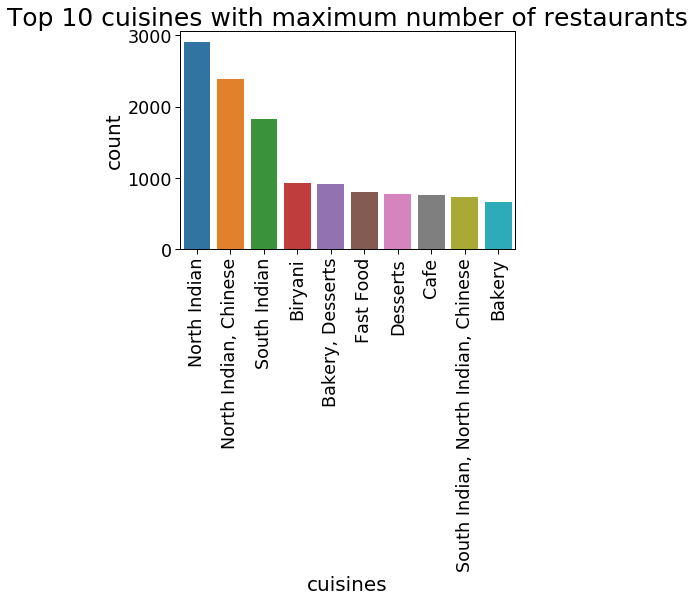

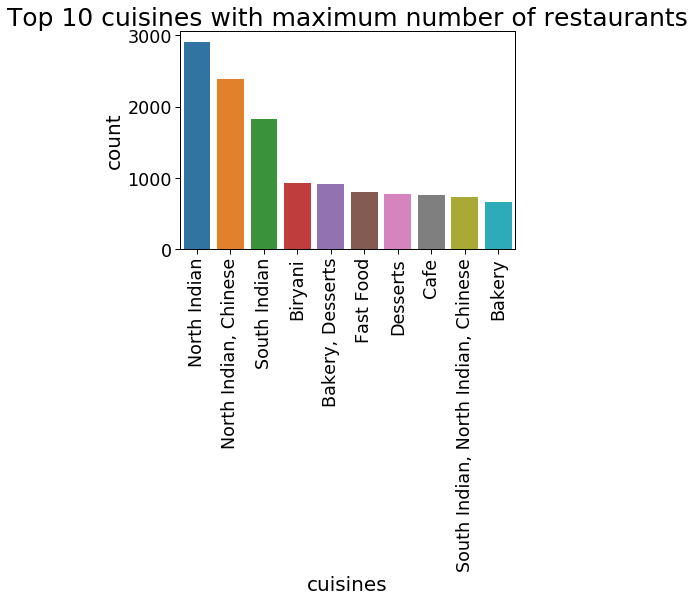

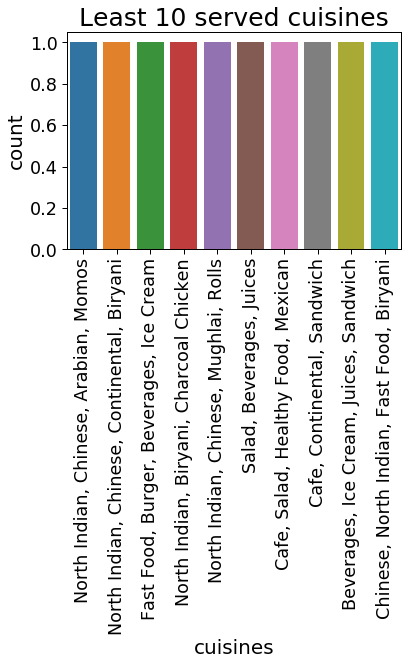

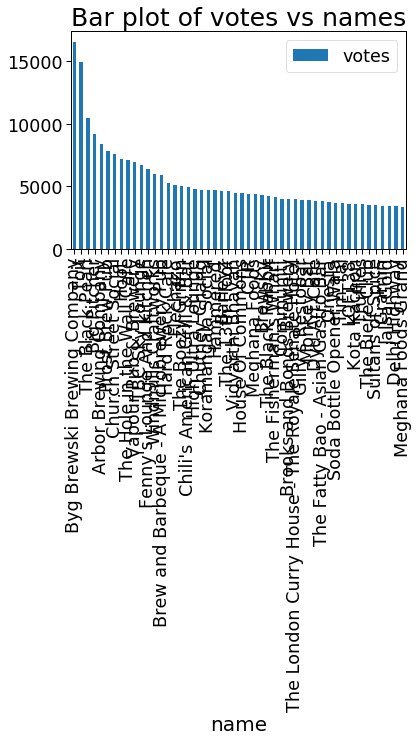

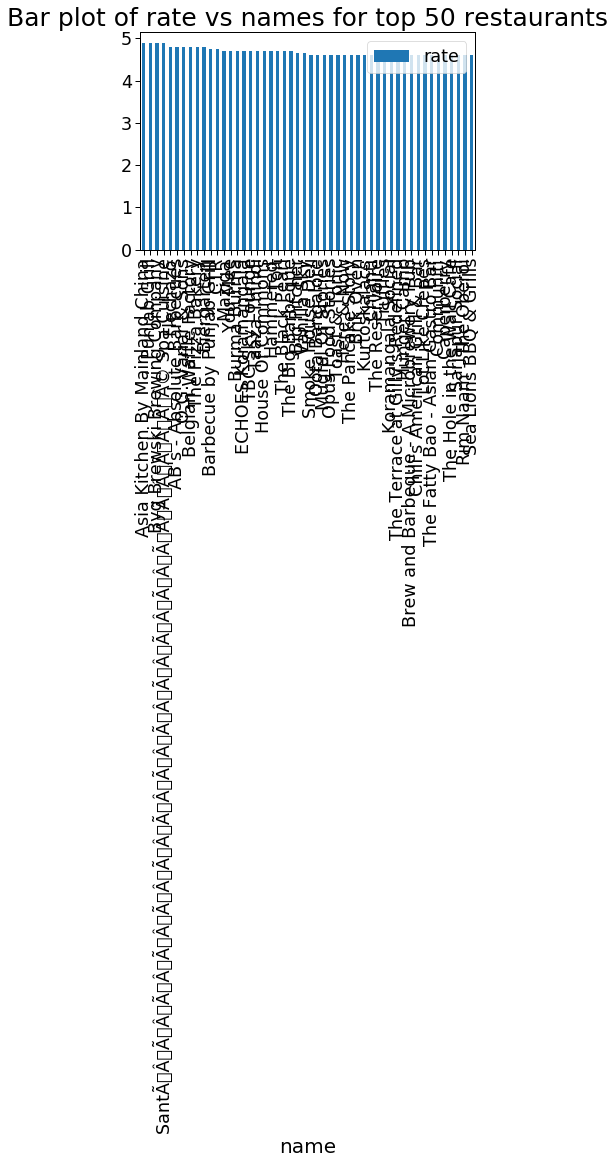

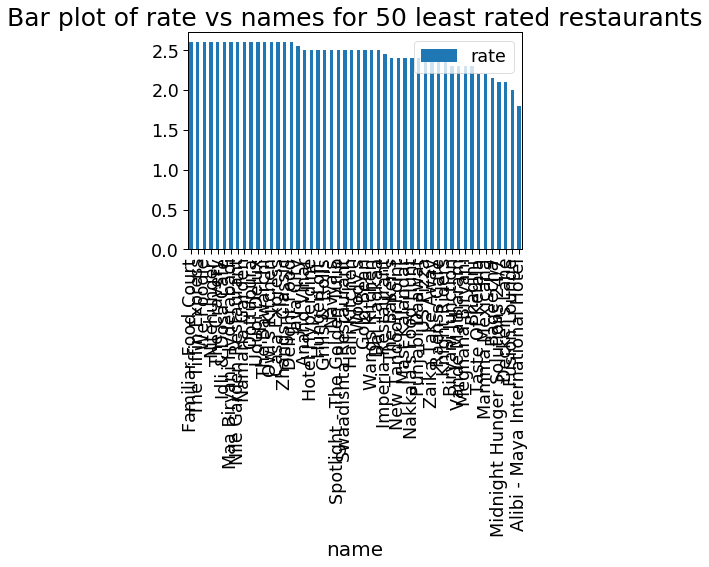

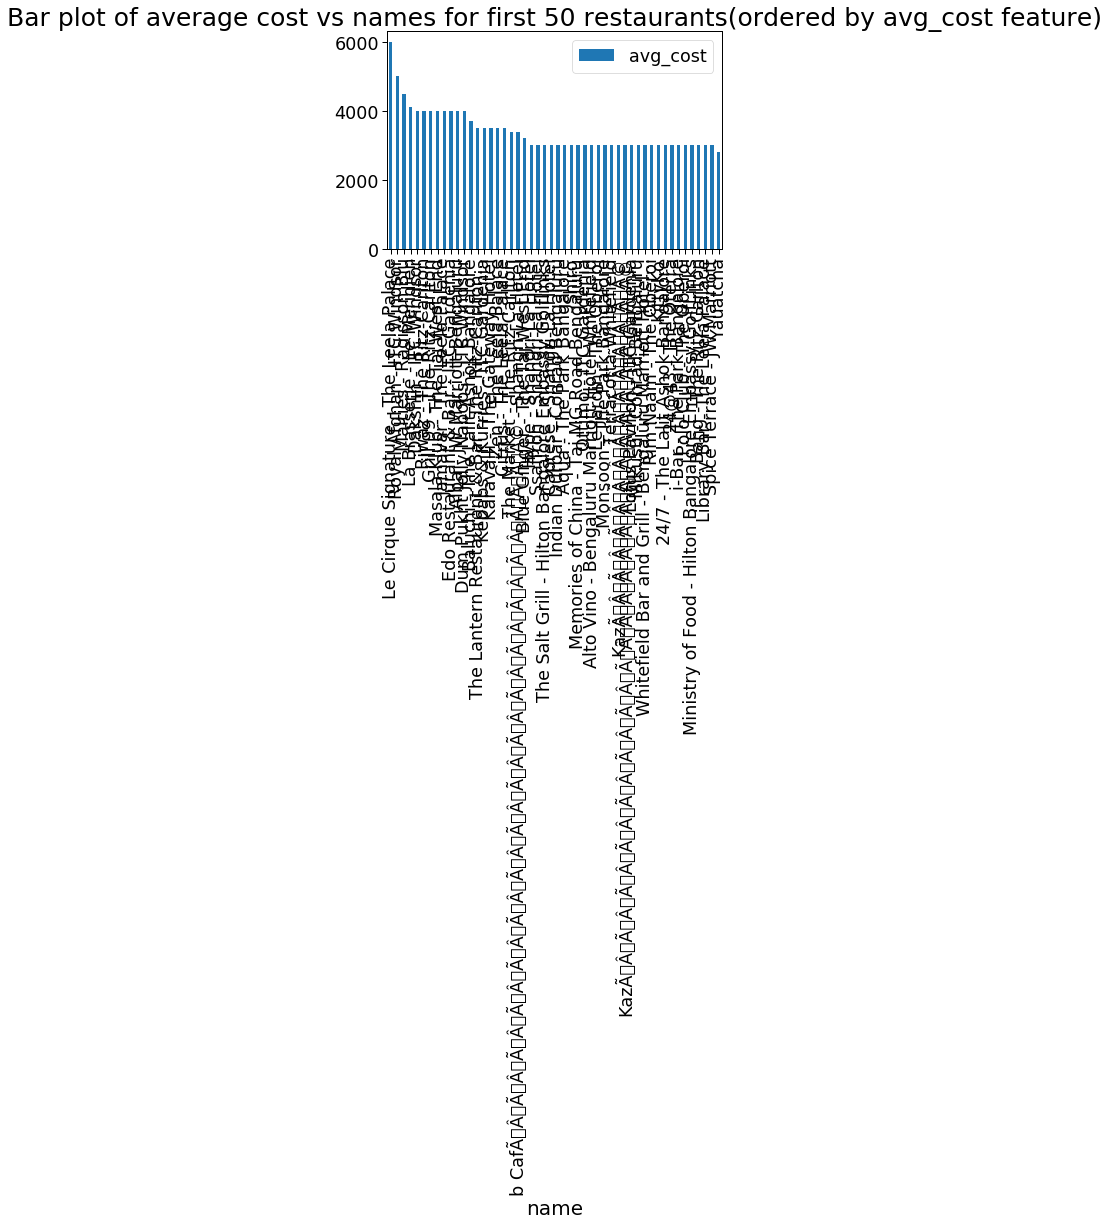

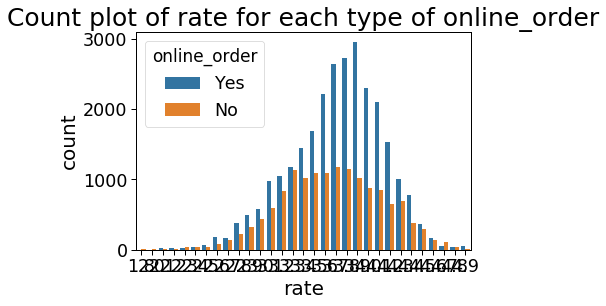

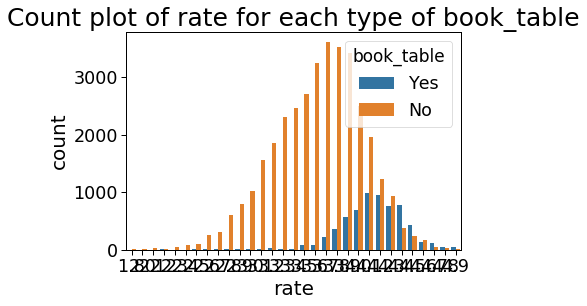

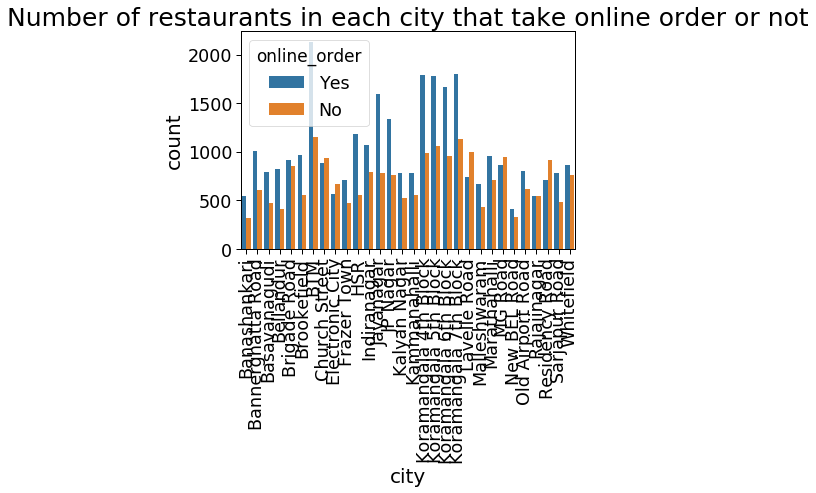

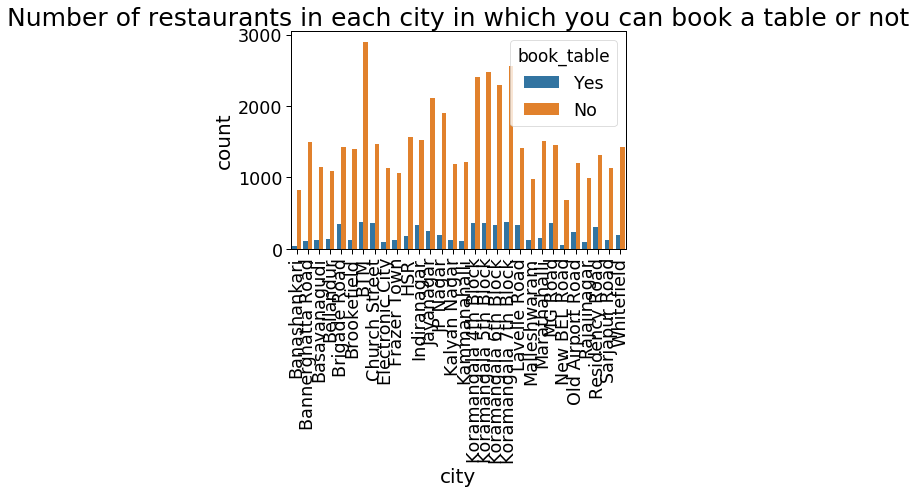

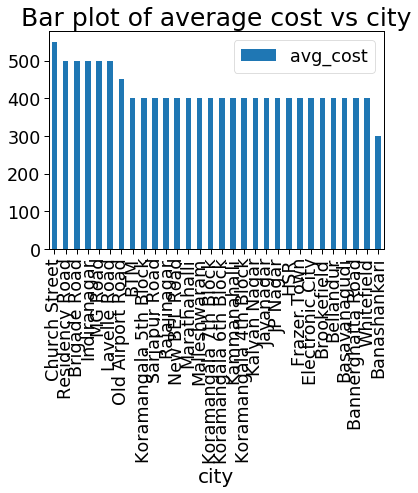

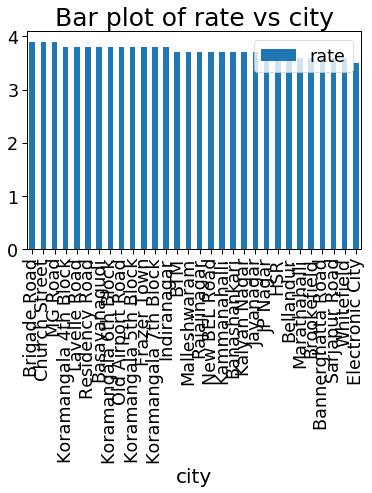

Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly S

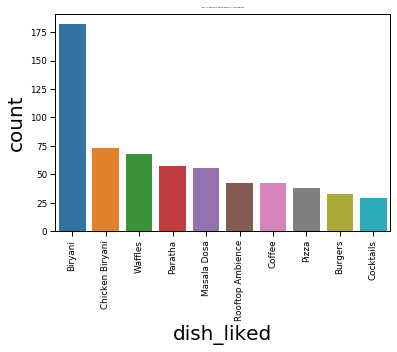

In [11]:
# importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# reading the dataset
df = pd.read_csv('zomato.csv')
dataset = df.copy()

# getting insights of the data
df.head()
df.info()

# deleting unnecessary data
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']

# rate feature
df['rate'].value_counts()
df['rate'].isnull().sum()

# Removing '/5' from rate column
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])

# renaming features
df = df.rename(columns={"approx_cost(for two people)": "avg_cost", "listed_in(type)": "meal_type",
                        "listed_in(city)": "city"})

df['city'].value_counts()
df['location'].value_counts()
df['city'].isnull().sum()
df['location'].isnull().sum()
# It seems that city attribute is better than location attribute

del df['location']

# checking null values
df.isnull().sum()

# Number of cities we have
len(df['city'].value_counts())

# plotting number of restaurtants that take online_order
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
sns.catplot(data=df, kind='count', x='online_order')
plt.title('Number of restaurants that take order online')
plt.show()

# plotting number of restaurants that have the option to book table
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
sns.catplot(data=df, kind='count', x='book_table')
plt.title('Number of restaurants that have the option to book table')
plt.show()

# plotting number of restaurants with meal type
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
sns.catplot(data=df, kind='count', x='meal_type')
plt.title('Number of restaurants according to meal type')
plt.show()
# we have highest number of delivery type restaurants

# plotting number of restaurants in each city
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.catplot(data=df, kind='count', x='city')
plt.title('Number of restaurants in each city')
b.set_xticklabels(rotation=90)
plt.show()

# tuning rate feature, converting '-' and 'NEW' to unrated
a = list(df['rate'])
for i in range(0, len(a)):
    if a[i] == 'nan':
        a[i] = 'unrated'
    elif a[i] == '-':
        a[i] = 'unrated'
    elif a[i] == 'NEW':
        a[i] = 'unrated'

df['rate'] = a

df['rate'].value_counts()

a = list(df['rate'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i] = None
    else:
        a[i] = float(a[i])
df['rate'] = a

# Plotting the number of restaurants for each rating
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.catplot(data=df, kind='count', x='rate', order=df['rate'].value_counts().index)
plt.title('Number of restaurants for each rating')
b.set_xticklabels(rotation=90)
plt.show()

# Plotting count plot of rest_type
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.catplot(data=df, kind='count', x='rest_type', order=df['rest_type'].value_counts().index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation=90)
plt.show()

# count plot of top 10
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.catplot(data=df, kind='count', x='rest_type', order=df['rest_type'].value_counts().head(10).index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation=90)
plt.show()

# count plot of type last 10
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.catplot(data=df, kind='count', x='rest_type', order=df['rest_type'].value_counts().tail(10).index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation=90)
plt.show()

# plotting count plot for avg_cost
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.catplot(data=df, kind='count', x='avg_cost', order=df['avg_cost'].value_counts().index)
plt.title('Number of restaurants for each average cost')
b.set_xticklabels(rotation=90)
plt.show()
# This is done to see the competition

# count plot of cuisines
b = sns.countplot(data=df, x='cuisines', order=df.cuisines.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()

# count plot of top 10 cuisines
b = sns.countplot(data=df, x='cuisines', order=df.cuisines.value_counts().head(10).iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()

# count plot of last 10 cuisines
b = sns.countplot(data=df, x='cuisines', order=df.cuisines.value_counts().tail(10).iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.title('Least 10 served cuisines')
plt.show()

# Bar plot of first 50 restaurants as per votes
df[['votes', 'name']].groupby(['name']).median().sort_values("votes", ascending=False).head(50).plot.bar()
plt.title('Bar plot of votes vs names')
plt.show()

# finding the details of the most voted restaurant
b = []
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i][0] == 'Byg Brewski Brewing Company' or a[i][0] == 'Byg Brewski Brewing Company ' or a[i][
        0] == ' Byg Brewski Brewing Company':
        b.append(list(a[i]))

b = pd.DataFrame(b)
b.columns = df.columns

# bar plot of restaurants vs rate for first 50
df[['rate', 'name']].groupby(['name']).median().sort_values("rate", ascending=False).head(50).plot.bar()
plt.title('Bar plot of rate vs names for top 50 restaurants')
plt.show()

# bar plot of last 50 restaurants as per rate
# a = a[0: len(a)-1]
a = pd.DataFrame(df['rate'])
a['name'] = df['name']
a = a.dropna(axis=0, how='any')
a[['rate', 'name']].groupby(['name']).median().sort_values("rate", ascending=False).tail(50).plot.bar()
plt.title('Bar plot of rate vs names for 50 least rated restaurants')
plt.show()

# removing ',' character from values in avg_cost feature
df['avg_cost'] = df['avg_cost'].apply(lambda x: str(x).replace(',', ''))
a = list(df['avg_cost'])
for i in range(0, len(a)):
    if a[i] != 'nan':
        a[i] = int(a[i])
    else:
        a[i] = None
df['avg_cost'] = a

# plotting barplot for name vs average cost for first 50
df[['avg_cost', 'name']].groupby(['name']).median().sort_values("avg_cost", ascending=False).head(50).plot.bar()
plt.title('Bar plot of average cost vs names for first 50 restaurants(ordered by avg_cost feature)')
plt.show()

# count plot of rate with hue = online_order
sns.countplot(data=df, hue='online_order', x='rate')
plt.title('Count plot of rate for each type of online_order')
plt.show()

# count plot of rate with hue = book_table
sns.countplot(data=df, hue='book_table', x='rate')
plt.title('Count plot of rate for each type of book_table')
plt.show()

# count plot of restaurants per city with hue = online_order
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.countplot(data=df, x='city', hue='online_order')
plt.title('Number of restaurants in each city that take online order or not')
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

# count plot of restaurants per city with hue = book_table
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.countplot(data=df, x='city', hue='book_table')
plt.title('Number of restaurants in each city in which you can book a table or not')
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

# plotting barplot for city vs average cost
df[['avg_cost', 'city']].groupby(['city']).median().sort_values("avg_cost", ascending=False).plot.bar()
plt.title('Bar plot of average cost vs city')
plt.show()
# Which city is costly to eat

# plotting barplot for city vs rate
# to find out which city is high rated or least rated
df[['rate', 'city']].groupby(['city']).median().sort_values("rate", ascending=False).plot.bar()
plt.title('Bar plot of rate vs city')
plt.show()

# plotting the top 10 dishes liked by people
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i, 6] == 'Friendly Staff':
        print(a[i, 6])
        a[i, 6] = None

a = pd.DataFrame(a)
a.columns = df.columns

sns.set_context("paper", font_scale=1, rc={"font.size": 2, "axes.titlesize": 2, "axes.labelsize": 20})
b = sns.countplot(data=a, x='dish_liked', order=a.dish_liked.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.title('Top 10 dishes liked by people of Bangalore')
plt.show()


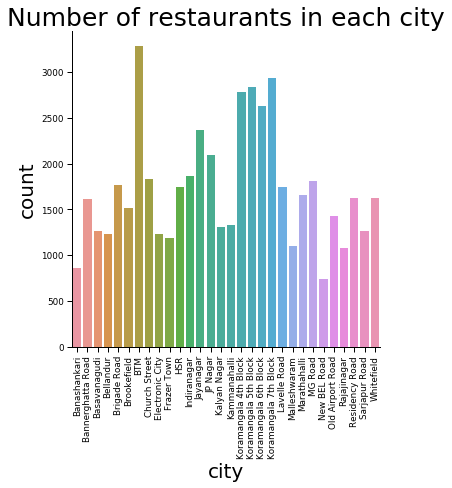

In [8]:
# plotting number of restaurants in each city
sns.set_context("paper", font_scale=1, rc={"font.size": 2, "axes.titlesize": 25, "axes.labelsize": 20})
b = sns.catplot(data=df, kind='count', x='city')
plt.title('Number of restaurants in each city')
b.set_xticklabels(rotation=90)
plt.show()